# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

## Background Information

The aim of this project is to use a dataset (powerproduction.csv) to create a model which makes predictions about the wind turbine power output (y) based in the wind speed input (x).

A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. The amount of electricity that a single turbine is able to produce depends on its size, the wind speed and the efficiency with which that specifically designed turbine is able to convert wind energy to electrical energy. The wind turbine will start operating at wind speeds of four to five metres per second. At speeds of 15 metres per second, the wind turbine will reach its maximum output. If the wind speeds reach 25 metres per second or greater, the turbine will be shut down to avoid damage to the turbine occurring. Therefore Wind energy is not a particularly reliable source of energy.

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.energy.gov%2Fsites%2Fprod%2Ffiles%2Fstyles%2Fborealis_photo_gallery_large_respondmedium%2Fpublic%2F2017%2F06%2Ff34%2Fwind_graphic.jpg%3Fitok%3DhwAc2zRU&imgrefurl=https%3A%2F%2Fwww.energy.gov%2Feere%2Farticles%2Fhow-do-wind-turbines-survive-severe-storms&tbnid=8YmI_ecoW43E0M&vet=12ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ..i&docid=iYnKIcxc0OBeFM&w=525&h=276&q=wind%20turbine%20speed&ved=2ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ](attachment:image.png)


https://en.wikipedia.org/wiki/Wind_turbine
https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
https://www.bordnamona.ie/company/our-businesses/powergen/frequently-asked-questions/
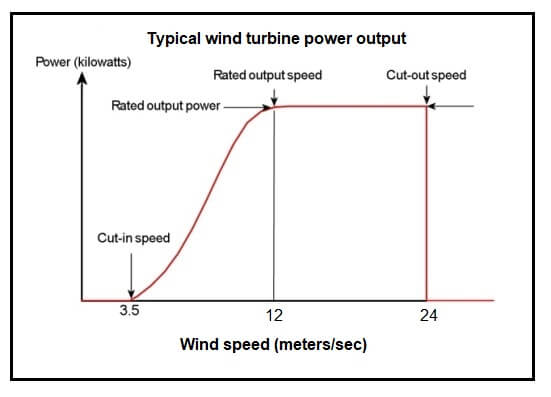

<br>

## 1. Import required libraries
***

Keras:
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. TensorFlow 2.0 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming.

Pandas:
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

Numpy:
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

Matplotlib:
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

Seaborn:
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

In [85]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn as sk
import sklearn.cluster as skcl
from sklearn.model_selection import train_test_split

In [86]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

## 2. Simple Investigation of the dataset
***

This is performed so I can get an understanding of the data and the shape of the line as there is not much detail about the dataset eg units of measurement, the timeframe the data is taken, is the data from one or many turbines, location etc.

There is only one input, speed, and one output, power.

In [87]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

df.head(10) # displays the first 10 rows of the data set as a table/array



,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


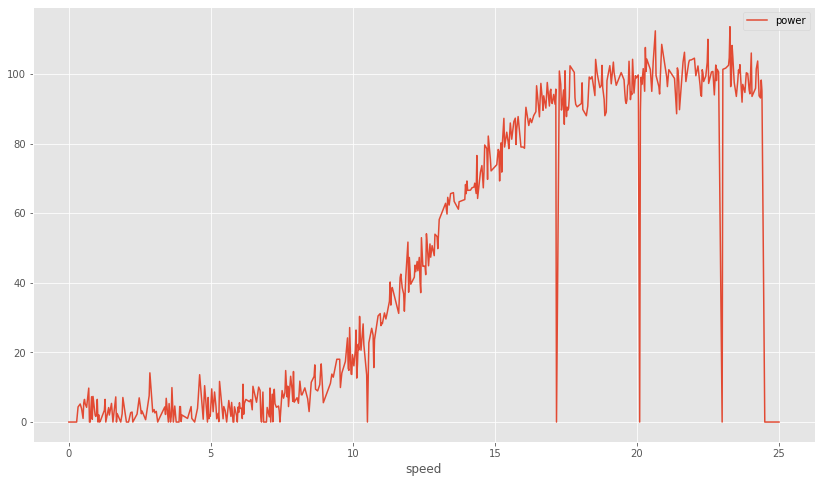

In [88]:
df.plot(x="speed", y="power")
plt.show()

In [89]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


From the scatterplot above I can see the data is not linear. There also 500 data points. The graph also follows the structure of the picture above ie the wind turbine begins to output power when the speed hits approximately 8 and stops when the speed hits approximately 24. This is a safety feature to prevent damage to the turbine at high speeds. Note there are some data points where the speed is zero. This may mean the turbines were turned off for maintenance, protection etc.

<br>

## 3. The model

***



## 3.1 Load the data and split into testing and training data
***

Dataset loaded. Now data is split into test data and training data

<em>df</em> = dataset imported above

<em> test_size:</em>represents the proportion of the dataset to include in the test split. Default is set to None and the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

<em>train_size:</em> represents the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

<em>random_state: </em> Controls the shuffling applied to the data before applying the split. 

<em>shuffle: </em> default=True whether to shuffle the data before splitting. 

<em>stratify: </em> array-like, default=None

Returns two split lists containing train-test split of inputs.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


In [94]:
# Option 1
sk.model_selection.train_test_split(df, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

[      speed    power
 419  20.796   94.216
 208  10.511    0.000
 171   8.534   11.422
 452  22.773  102.544
 465  23.373  104.977
 ..      ...      ...
 49    2.477    6.947
 426  21.421  101.721
 59    3.078    3.063
 378  18.919   89.047
 128   6.481   10.262
 
 [375 rows x 2 columns],
       speed    power
 247  12.462   44.745
 177   8.859   14.160
 375  18.794   96.054
 304  15.465   80.418
 38    1.702    2.439
 ..      ...      ...
 495  24.775    0.000
 23    1.001    6.511
 477  23.849  100.322
 56    3.003    3.578
 104   5.506    3.200
 
 [125 rows x 2 columns]]

In [97]:
#Changing pandas dataframe to numpy array
#Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. 
#The preprocessing of data depends on the type of data.
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5 
#X = df.iloc[:,:20].values
#y = df.iloc[:,20:21].values

In [98]:
#Option 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

y_train

X_test

y_test

array([], shape=(165, 0), dtype=float64)

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [42]:
#Changing pandas dataframe to numpy array
#Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. 
#The preprocessing of data depends on the type of data.
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5 
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

In [43]:
#Normalizing the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

#This step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. It is an important step and you can check the difference in accuracies on our dataset by removing this step. It is mainly required in case the dataset features vary a lot as in our case the value of battery power is in the 1000’s and clock speed is less than 3. So if we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate. Study further from this link.

In [44]:
#Generally, it is better to split data into training and testing data. Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting. 
#This will split our dataset into training and testing. Training data will have 90% samples and test data will have 10% samples. This is specified by the test_size argument.


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

<br>

### 3.1 First attempt - k-means Cluster

Load Data.
Define Keras Model.
Compile Keras Model.
Fit Keras Model.
Evaluate Keras Model.
Tie It All Together.
Make Predictions

In [45]:
import sklearn.cluster as skcl

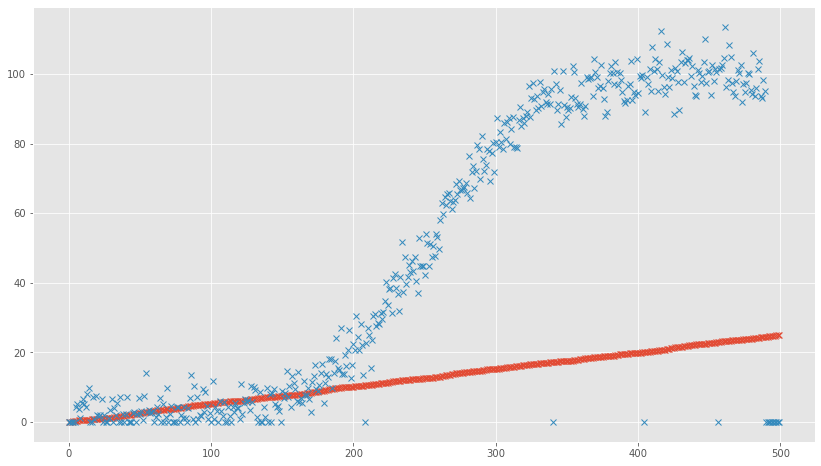

In [46]:
plt.plot(X, 'x')

In [47]:
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(df)

In [48]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
kmeans.predict([[0,0],[25,8]])

array([0, 0])

In [50]:
kmeans.cluster_centers_

array([[ 7.26047744, 11.148     ],
       [18.64919658, 89.92275214]])

<br>

### 3.1 First attempt - sk-learn neural network

Load Data.
Define Keras Model.
Compile Keras Model.
Fit Keras Model.
Evaluate Keras Model.
Tie It All Together.
Make Predictions

In [51]:
import sklearn.neural_network as sknn

w2d = w.reshape(-1, 1) # 2-d array inputs

regr = sknn.MLPRegressor(max_iter=10000).fit(w2d, d) #Train neural network

np.array([d, regr.predict(w2d)]).T

NameError: name 'w' is not defined

In [52]:
# the score

regr.score(w2d, d)

NameError: name 'regr' is not defined

<br>

## Another attempt

### 3.1 First attempt

Load Data.
Define Keras Model.
Compile Keras Model.
Fit Keras Model.
Evaluate Keras Model.
Tie It All Together.
Make Predictions

In [53]:
# FAKE DATASET
# that know has a linear relationship with some noise
# use lambda notion: https://www.w3schools.com/python/python_lambda.asp

# Simple linear equation.
f = lambda x: 3.0 * x + 1.0

In [54]:
x="speed"
y="power"

In [99]:
# Create a training data frame with x and y values.
# The x values are randomly selected between 0 and 100.
# y_i is f(x_i)
train = pd.(['speed', 'power']) #Panda dataframe (x, f(x)), y=f(x). no noise added yet
train['speed'] = x # ie choose 1000 random data points for x between 0 and 100 using function above
train['power'] = f(train['speed']) # 
train

SyntaxError: invalid syntax (<ipython-input-99-ed827c6d4569>, line 4)

In [56]:
x="speed"
y="power"

In [57]:
# Create a corresponding test data frame. as per above
# It might be better to create one big data frame and randomly select test cases.
test = pd.DataFrame(df)
test['speed'] = x # only 100 data points
test['power'] = f(test['speed'])
test

TypeError: can't multiply sequence by non-int of type 'float'

In [58]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
#single neuron
# model is linear
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
# adam is used as the optimiser as it is adaptive
model.compile('adam', loss='mean_squared_error')

In [59]:
# Train the neural network on our training data.
#fit training dataset to neural network, pass x values in to neural network and determine what y would be. See if these y values match the model y-values
# epoch means that every single xvalue goes throught the neural network 500 times. Everytime it goes through, the NN tries to improve the prediction
# can see the improvement in the epoch log below from 1 to 500 to decrease the loss. Want a small loss value ie miniscule but may depend on the dataset
# if peters out at a high level may need to change the model or check out the inputs as they may need preprocessing
# adam (learning rate) 
model.fit(train['x'], train['y'], epochs=500)
# 500 epochs can take time

NameError: name 'train' is not defined

In [60]:
# Take four hand-picked values and see their predictions.
# see if they compare to data faked above
model.predict([1.0,2.0,3.0,100.0])

array([[  1.],
       [  2.],
       [  3.],
       [100.]], dtype=float32)

In [61]:
# See what f says they are.
#comparable to NN prediction in cell above
# NN knows nothing about the function but has learned how to calculate the function
np.array([[f(i)] for i in [1.0, 2.0, 3.0, 100.0]])

array([[  4.],
       [  7.],
       [ 10.],
       [301.]])

In [62]:
# Let's plot our predictions of the x values we trained on
# ie 
plt.plot(test['x'], test['y'], label='actual') #
plt.plot(test['x'], model.predict(test['x']), label='prediction') #ie after training
plt.legend();

KeyError: 'x'

In [63]:
# Evaluate the neural network on the test data.
model.evaluate(test['x'], test['y'])

KeyError: 'x'

In [64]:
# Let's set f to a polynomial instead. ie more complex
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0 # adding in x-squared value

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f) # apply(f) is a Pandas method

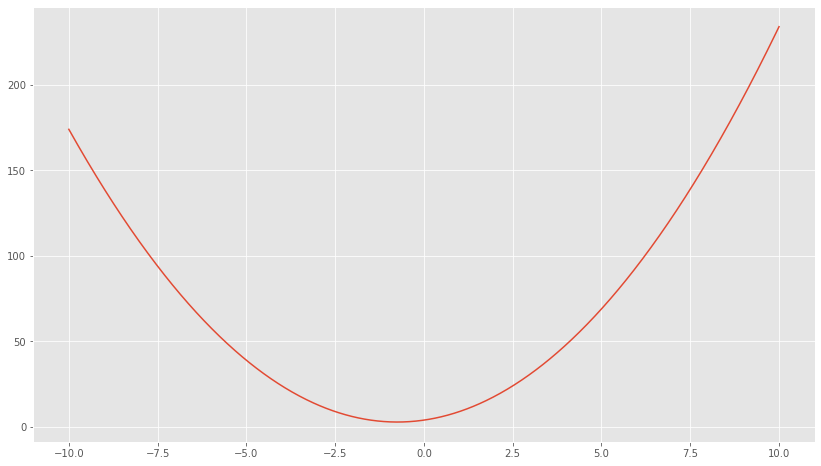

In [65]:
# Have a look.
plt.plot(poly['x'], poly['y']);

In [66]:
# Re-build our model. same code as above
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [67]:
# Fit the data.Loss function going down but slowly
model.fit(poly['x'], poly['y'], epochs=500)

# if NaNs thn there is a problem with the model

Epoch 1/500
32/32 [==============================] - 2s 2ms/step - loss: 8484.0574
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 8123.4539
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 8726.2180
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 8672.2816
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 8471.1009
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 9064.4230
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 8595.0439
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 8954.8671
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 9300.1562
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 8458.0755
Epoch 11/500
32/32 [==============================] - 0s 1ms/step - loss: 8590.9444
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 8985.8035
E

32/32 [==============================] - 0s 2ms/step - loss: 8337.6566
Epoch 195/500
32/32 [==============================] - 0s 2ms/step - loss: 7392.4552
Epoch 196/500
32/32 [==============================] - 0s 1ms/step - loss: 8264.2661
Epoch 197/500
32/32 [==============================] - 0s 2ms/step - loss: 7822.0025
Epoch 198/500
32/32 [==============================] - 0s 2ms/step - loss: 8313.7555
Epoch 199/500
32/32 [==============================] - 0s 2ms/step - loss: 7895.4262
Epoch 200/500
32/32 [==============================] - 0s 2ms/step - loss: 7532.2093
Epoch 201/500
32/32 [==============================] - 0s 2ms/step - loss: 7746.8126
Epoch 202/500
32/32 [==============================] - 0s 2ms/step - loss: 7713.9914
Epoch 203/500
32/32 [==============================] - 0s 2ms/step - loss: 7882.7886
Epoch 204/500
32/32 [==============================] - 0s 2ms/step - loss: 8275.3750
Epoch 205/500
32/32 [==============================] - 0s 2ms/step - loss: 7202

32/32 [==============================] - 0s 1ms/step - loss: 7436.3375
Epoch 387/500
32/32 [==============================] - 0s 2ms/step - loss: 6864.2906
Epoch 388/500
32/32 [==============================] - 0s 2ms/step - loss: 7518.4746
Epoch 389/500
32/32 [==============================] - 0s 2ms/step - loss: 7009.3139
Epoch 390/500
32/32 [==============================] - 0s 1ms/step - loss: 6931.0616
Epoch 391/500
32/32 [==============================] - 0s 1ms/step - loss: 7112.7731
Epoch 392/500
32/32 [==============================] - 0s 2ms/step - loss: 6969.9309
Epoch 393/500
32/32 [==============================] - 0s 2ms/step - loss: 6759.7361
Epoch 394/500
32/32 [==============================] - 0s 2ms/step - loss: 6835.3746
Epoch 395/500
32/32 [==============================] - 0s 2ms/step - loss: 7175.2606
Epoch 396/500
32/32 [==============================] - 0s 2ms/step - loss: 7053.8335
Epoch 397/500
32/32 [==============================] - 0s 2ms/step - loss: 6865

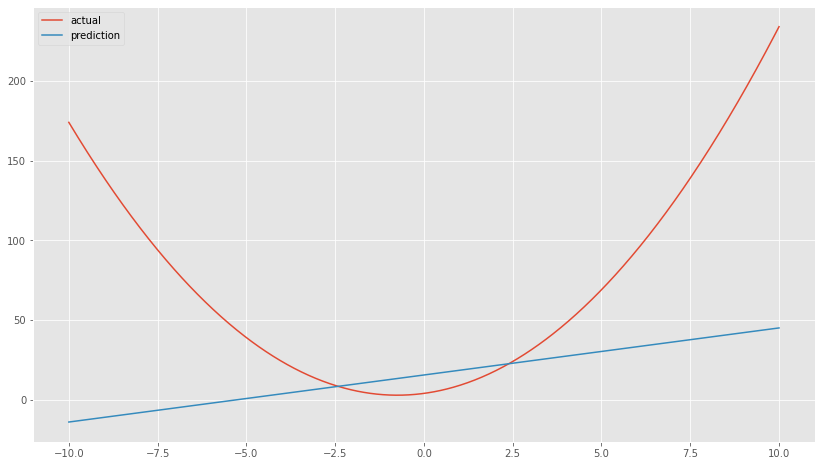

In [68]:
# Plot the predictions (on the training set itself).
#trying to do it on a linear line - ie model is wrong. can't mimic the red line. could fix by adding more layers/neurons
# instead will use a different activation function as per below
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();